In [271]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = titanic.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y))

In [272]:
train = pd.read_csv("/Users/houzhuo/Downloads/train.csv")
test    = pd.read_csv("/Users/houzhuo/Downloads/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [273]:
full = train.append(test,ignore_index=True)
titanic = full[:891]
print ('Datasets:' , 'full:' , full.shape , 'titanic:' , titanic.shape)
titanic.head()

('Datasets:', 'full:', (1309, 12), 'titanic:', (891, 12))


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [150]:
titanic.describe()
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


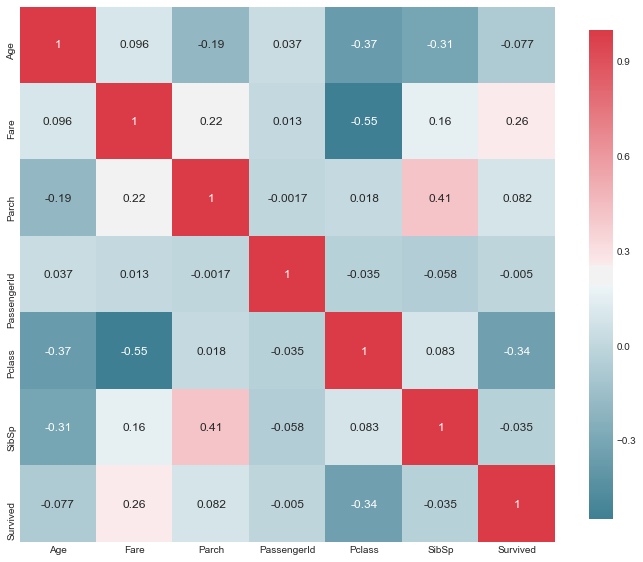

In [151]:
plot_correlation_map(titanic)

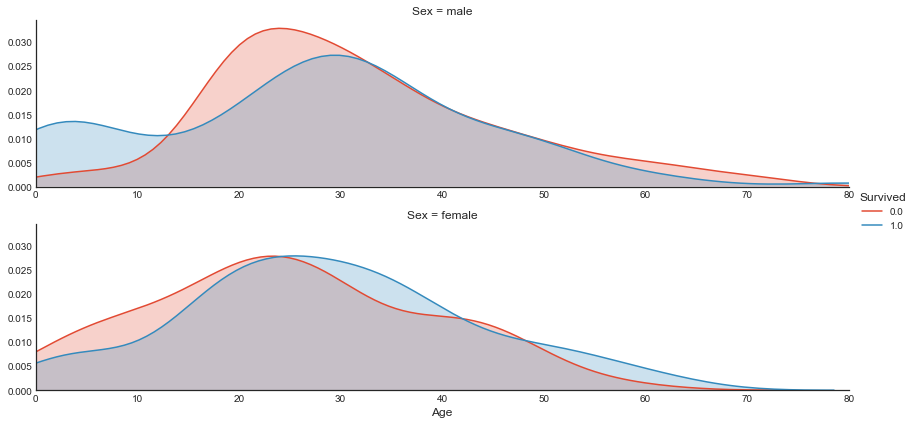

In [121]:
plot_distribution( titanic , var = 'Age' , target = 'Survived' , row = 'Sex')         

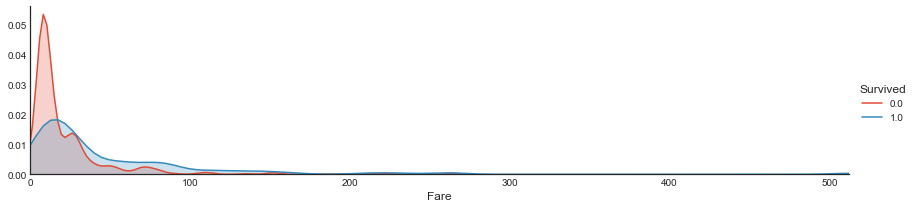

In [7]:
plot_distribution( titanic , var = 'Fare' , target = 'Survived')

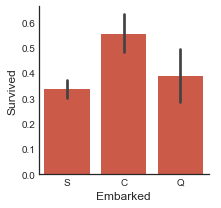

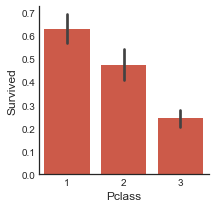

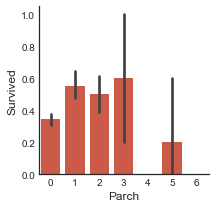

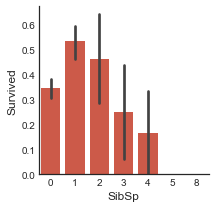

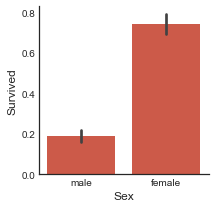

In [8]:
plot_categories(titanic,cat='Embarked',target='Survived')
plot_categories(titanic,cat='Pclass',target='Survived')
plot_categories(titanic,cat='Parch',target='Survived')
plot_categories(titanic,cat='SibSp',target='Survived')
plot_categories(titanic,cat='Sex',target='Survived')

In [152]:
sex = pd.Series( np.where( full.Sex == 'male' , 1 , 0 ) , name = 'Sex' )

In [153]:
embarked = pd.get_dummies( full.Embarked , prefix='Embarked' )
embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [154]:
pclass = pd.get_dummies(full.Pclass,prefix='Pclass')
pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [155]:
full.info()#need to fill age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [156]:
full.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Connolly, Miss. Kate",male,CA. 2343
freq,6,914,2,843,11


In [274]:
title = pd.DataFrame()
title['Title'] = full['Name'].map(lambda name:name.split(',')[1].split( '.' )[0].strip())
# a map of more aggregated titles
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"

                    }
title['Title'] = title.Title.map(Title_Dictionary)
#we also need add Title to full to predict Age
title = pd.get_dummies( title.Title )
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [275]:
def get_titles():

    global full
    
    # we extract the title from each name
    full['Title'] = full['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"

                        }
    
    # we map each title
    full['Title'] = full.Title.map(Title_Dictionary)
get_titles()
full.tail()
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [276]:
#predict Age
grouped_train = full.head(891).groupby(['Survived','Sex','Pclass'])
grouped_median_train = grouped_train.median()

grouped_test = full.iloc[891:].groupby(['Sex','Pclass','Title'])
grouped_median_test = grouped_test.median()
grouped_median_train



Age       Fare  Parch  PassengerId  SibSp
Survived Sex    Pclass                                            
0.0      female 1       25.0  151.55000    2.0        298.0    1.0
                2       32.5   17.00000    0.0        335.5    0.5
                3       22.0   14.47915    1.0        430.5    1.0
         male   1       45.5   42.40000    0.0        439.0    0.0
                2       30.5   13.00000    0.0        419.0    0.0
                3       25.0    7.89580    0.0        471.5    0.0
1.0      female 1       35.0   82.17080    0.0        458.0    0.0
                2       28.0   23.00000    0.0        442.5    0.0
                3       19.0    9.46875    0.0        322.5    0.0
         male   1       36.0   35.50000    0.0        588.0    0.0
                2        3.0   18.75000    1.0        408.0    0.0
                3       25.0    8.05000    0.0        430.0    0.0

In [277]:
def process_age():
    
    global full
    
    # a function that fills the missing values of the Age variable
    
    def fillAges(row, grouped_median):
        if row['Sex']=='female' and row['Pclass'] == 1:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 1, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 1, 'Mrs']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['female', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['female', 1, 'Royalty']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 2:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 2, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 2, 'Mrs']['Age']

        elif row['Sex']=='female' and row['Pclass'] == 3:
            if row['Title'] == 'Miss':
                return grouped_median.loc['female', 3, 'Miss']['Age']
            elif row['Title'] == 'Mrs':
                return grouped_median.loc['female', 3, 'Mrs']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 1:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 1, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 1, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 1, 'Officer']['Age']
            elif row['Title'] == 'Royalty':
                return grouped_median.loc['male', 1, 'Royalty']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 2:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 2, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 2, 'Mr']['Age']
            elif row['Title'] == 'Officer':
                return grouped_median.loc['male', 2, 'Officer']['Age']

        elif row['Sex']=='male' and row['Pclass'] == 3:
            if row['Title'] == 'Master':
                return grouped_median.loc['male', 3, 'Master']['Age']
            elif row['Title'] == 'Mr':
                return grouped_median.loc['male', 3, 'Mr']['Age']
    
    full.head(891).Age = full.head(891).apply(lambda r : fillAges(r, grouped_median_train) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
    full.iloc[891:].Age = full.iloc[891:].apply(lambda r : fillAges(r, grouped_median_test) if np.isnan(r['Age']) 
                                                      else r['Age'], axis=1)
    
process_age()
full.info()

KeyError: (u'the label [male] is not in the [index]', u'occurred at index 5')

In [278]:
# Fill missing values of Fare with the average of Fare (mean)
imputed = pd.DataFrame()
imputed[ 'Fare' ] = full.Fare.fillna( full.Fare.mean() )
imputed.head()
imputed.info()
imputed['Fare'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 1 columns):
Fare    1309 non-null float64
dtypes: float64(1)
memory usage: 10.3 KB


8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
10.5000    35
7.7750     26
7.2292     24
7.9250     23
26.5500    22
7.8542     21
7.2250     21
8.6625     21
7.2500     18
0.0000     17
21.0000    14
16.1000    12
9.5000     12
27.7208    11
69.5500    11
14.5000    11
15.5000    10
7.8792     10
14.4542    10
7.7958     10
15.2458     9
24.1500     9
7.0500      9
52.0000     8
7.5500      8
           ..
7.2833      1
8.4333      1
6.8583      1
9.3250      1
7.5792      1
7.5750      1
9.4750      1
28.7125     1
40.1250     1
25.5875     1
7.7292      1
9.8458      1
7.8500      1
7.7417      1
6.4500      1
7.7208      1
10.1708     1
12.6500     1
10.5167     1
34.6542     1
27.4458     1
26.3875     1
8.1375      1
15.5792     1
8.1583      1
8.0292      1
12.7375     1
8.6542      1
34.0208     1
7.1417      1
Name: Fare, Length: 282, dtype: int64

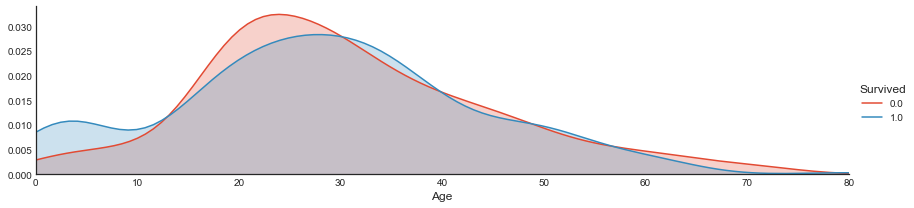

In [162]:
# Create dataset
plot_distribution( titanic , var = 'Age' , target = 'Survived' )         

0    1291
1      18
Name: IsOld, dtype: int64

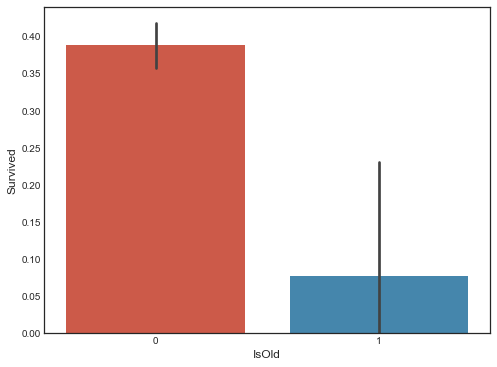

In [279]:
age = pd.DataFrame()
age[ 'Age' ] = full.Age
#age['Age'].head()
#age[ 'Baby' ] = age[ 'Age' ].map( lambda x : 1 if 0 <= x <=14 else 0 )
#age[ 'Young' ]  = age[ 'Age' ].map( lambda x : 1 if 15 <= x <=30 else 0 )
#age[ 'Adult' ]  = age[ 'Age' ].map( lambda x : 1 if 31 <= x <=40 else 0 )
#age[ 'Old' ]  = age[ 'Age' ].map( lambda x : 1 if 41 <= x <=58 else 0 )
#age[ 'VeryOld' ]  = age[ 'Age' ].map( lambda x : 1 if 59 <= x else 0 )
#age = age.drop(['Age'],axis=1)
full['IsOld'] = np.where(full['Age']>=64,1,0)
sns.barplot('IsOld','Survived',data=full)
full['IsOld'].value_counts()
#age = pd.get_dummies(age['Age'],prefix='Age')
#age['Age'].value_counts()

In [175]:
cabin = pd.DataFrame()

# replacing missing cabins with U (for Uknown)
cabin[ 'Cabin' ] = full.Cabin.fillna( 'U' )

# mapping each Cabin value with the cabin letter
cabin[ 'Cabin' ] = cabin[ 'Cabin' ].map( lambda c : c[0] )
cabin
# dummy encoding ...
cabin = pd.get_dummies( cabin['Cabin'] , prefix = 'Cabin' )

#cabin.head()

In [178]:
family = pd.DataFrame()

# introducing a new feature : the size of families (including the passenger)
family[ 'FamilySize' ] = full[ 'Parch' ] + full[ 'SibSp' ] + 1

# introducing other features based on the family size
family[ 'Family_Single' ] = family[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
family[ 'Family_Small' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
family[ 'Family_Large' ]  = family[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )
#family = family.drop(['FamilySize'],axis=1)
family.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [166]:
full_X = pd.concat( [  age,sex ,imputed, embarked , cabin , title ,family,pclass ] , axis=1 )
full_X.info()
full_X.head()

In [287]:
full['Ticket_Lett'] = full['Ticket'].apply(lambda x: str(x)[0])
full['Ticket_Lett'].value_counts()
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,IsOld,Ticket_Lett
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,0,A
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,0,P
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0,S
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,0,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0,3


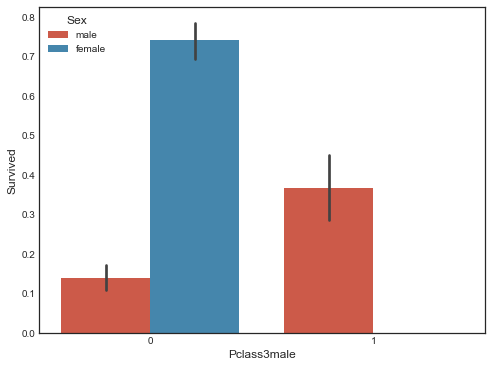

In [303]:
#pclass3female = list(set(full[(full.Sex=='female') & (full['Pclass']==3)]['PassengerId'].values))
#full['Pclass3female'] = np.where(full['PassengerId'].isin(pclass3female),1,0)
#sns.barplot(x="Pclass3female", y="Survived",  data=full);
pclass3male = list(set(full[(full.Sex=='male') & (full['Pclass']==1)]['PassengerId'].values))
full['Pclass3male'] = np.where(full['PassengerId'].isin(pclass3male),1,0)
sns.barplot(x="Pclass3male", y="Survived", hue = 'Sex' ,data=full);

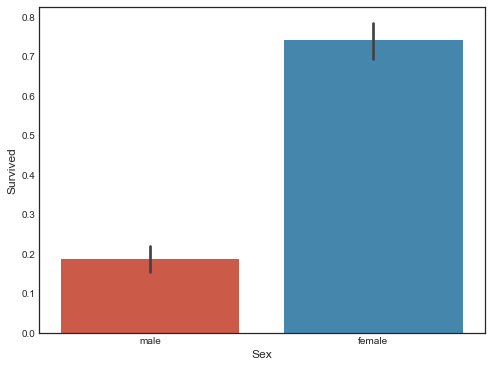

In [298]:
sns.barplot(x="Sex", y="Survived",data=full);

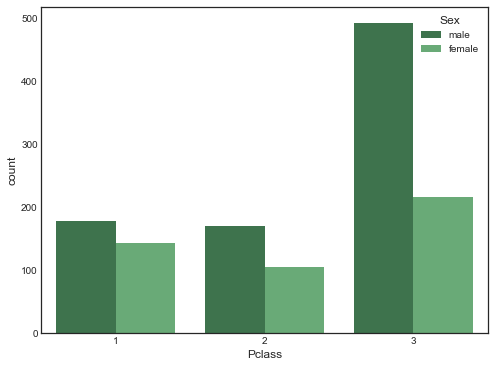

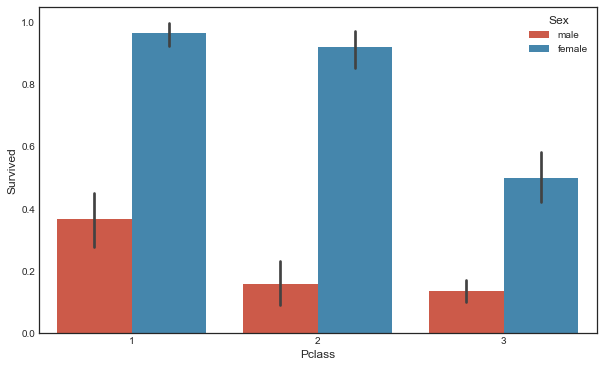

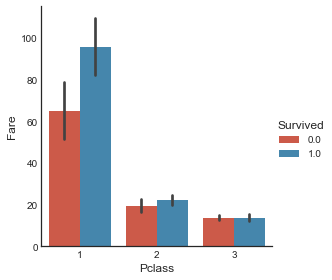

In [261]:
#full['Ticket_Lett'].hist(color = 'g')
sns.countplot(x="Pclass",hue="Sex", data=full, palette="Greens_d");
plt.figure(figsize=(10,6))
#sns.lmplot("Age", "Fare", full, col="Survived");
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=full);
#sns.barplot(x="Sex", y="Survived", hue="Pclass", data=full);
full['Pclass'].value_counts()
sns.factorplot(x="Pclass", y="Fare", hue="Survived", data=full, kind="bar");

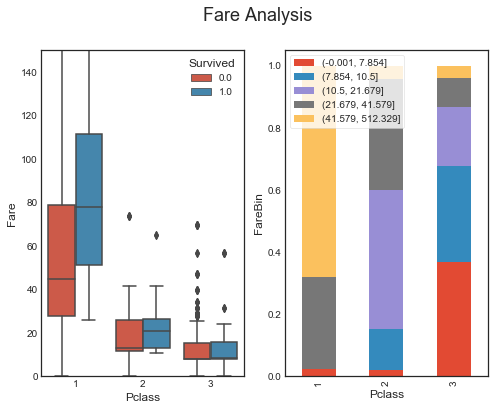

In [249]:
# Fare analysis
full['FareBin'] = pd.qcut(full['Fare'], 5)
plt.suptitle("Fare Analysis", fontsize=18)
plt.subplot(121)
sns.boxplot('Pclass', 'Fare', 'Survived', full, orient='v')
plt.ylim((0,150))
ax1 = plt.subplot(122)
tab = pd.crosstab(full['Pclass'], full['FareBin'])
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax1)
plt.xlabel('Pclass')
plt.ylabel('FareBin')
plt.legend(frameon=True)

plt.show()

<Container object of 929 artists>

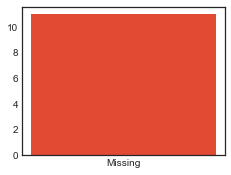

In [185]:
plt.subplot(223)
plt.bar('Missing', full.Ticket.value_counts())

In [167]:
X_train= full_X[ 0:891 ]
y_train = titanic.Survived
X_test = full_X[ 891: ]
print (full_X.shape , X_train.shape , X_test.shape , y_train.shape )
X_train.head()

((1309, 28), (891, 28), (418, 28), (891,))


,Age,Sex,Fare,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,...,Mrs,Officer,Royalty,FamilySize,Family_Single,Family_Small,Family_Large,Pclass_1,Pclass_2,Pclass_3
0,22.0,1,7.2500,0,0,1,0,0,0,0,...,0,0,0,2,0,1,0,0,0,1
1,38.0,0,71.2833,1,0,0,0,0,1,0,...,1,0,0,2,0,1,0,1,0,0
2,26.0,0,7.9250,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
3,35.0,0,53.1000,0,0,1,0,0,1,0,...,1,0,0,2,0,1,0,1,0,0
4,35.0,1,8.0500,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [179]:
def compute_score(model, X, y, scoring='accuracy'):
    xval = cross_val_score(model, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [136]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_selection import SelectFromModel
#parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
#model = RandomForestClassifier(**parameters)
#model = model.fit(X_train, y_train)
#compute_score(model,X_train, y_train, scoring='accuracy')

0.82719669960887132

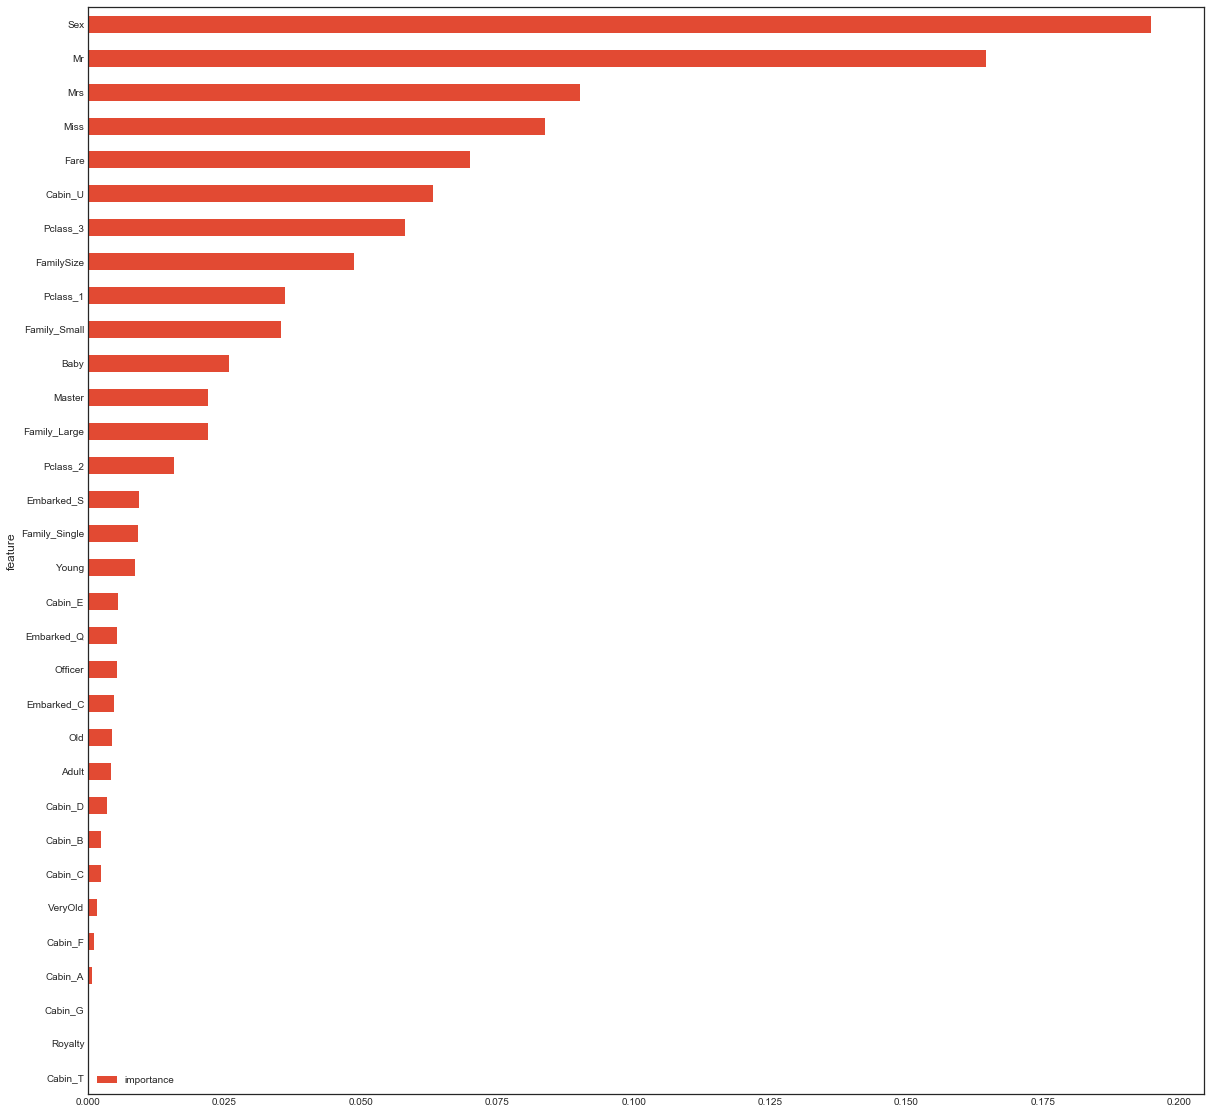

In [137]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = model.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)
features.plot(kind='barh', figsize=(20, 20))

In [169]:
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedKFold
parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 10],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [2, 3, 10],
                 'bootstrap': [True, False],
                 }
forest = RandomForestClassifier()
cross_validation = StratifiedKFold(y_train, n_folds=5)
#print 'serching..'

grid_search = GridSearchCV(forest,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)
model = grid_search
parameters = grid_search.best_params_

print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
model = RandomForestClassifier(**parameters)
model.fit(X_train, y_train)

Best score: 0.83950617284
Best parameters: {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 10, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': 6}


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=6, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [180]:
compute_score(model,X_train, y_train, scoring='accuracy')

0.8249368835305646

In [171]:
y_test = model.predict( X_test )

passenger_id = full[891:].PassengerId
test = pd.DataFrame( { 'PassengerId': passenger_id , 'Survived': y_test.astype(np.int64) } )
#test.shape
#test.head()
test.to_csv( 'titanic_pred.csv' , index = False )